# Visualization of filters and intermediate layers in CNN

### Setting up notebook

Setting analyses on GPUs

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Importing libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Preparing data

Data loading and preprocessing

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()
y_train = to_categorical(y_train_raw, num_classes = 10)
y_test = to_categorical(y_test_raw, num_classes = 10)

In [4]:
### Enter your code here (2 lines)
x_train = x_train_raw.reshape(60000,28,28,1)
x_test = x_test_raw.reshape(10000,28,28,1)


In [5]:
###
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Showing one sample of the mnist dataset (handwritting image data)

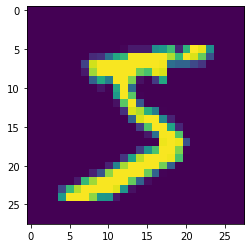

In [6]:
plt.imshow(x_train.reshape(60000,28,28)[0])

### Building CNN model

Building convolutional neural network (four layers)

In [7]:
def model_CNN():


    model = Sequential()

### ENTER YOUR CODE HERE (+- 12 lines)

    model.add(Conv2D(32, (5, 5), padding='same', input_shape=x_train.shape[1:], activation='relu')) # Layer 1
    model.add(Conv2D(32,(5, 5), padding='same',activation='relu' )) # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # Layer 3
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu')) # Layer 4
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256,activation='relu' ))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))


### END


# compile model
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

CNNModel = model_CNN()

In [8]:
CNNModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [9]:
with tf.device('/GPU:0'):

    history = CNNModel.fit(x_train, y_train, epochs=30, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 23s 7ms/step - loss: 0.3156 - accuracy: 0.8999 - val_loss: 0.0450 - val_accuracy: 0.9860
Epoch 2/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0542 - accuracy: 0.9844 - val_loss: 0.0250 - val_accuracy: 0.9921
Epoch 3/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0391 - accuracy: 0.9874 - val_loss: 0.0288 - val_accuracy: 0.9902
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.0254 - val_accuracy: 0.9905
Epoch 5/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0279 - accuracy: 0.9916 - val_loss: 0.0206 - val_accuracy: 0.9933
Epoch 6/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0213 - val_accuracy: 0.9925
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0223 - val_ac

### Vizualizing filters from the first two Conv2D layers

Print one filter's raw data from the first Conv2D layer

In [10]:
CNNModel.layers[0].get_weights()[0].T[0].reshape(5,5)

array([[ 7.7845454e-02,  5.3472359e-02,  7.5704955e-02, -4.4936661e-04,
        -3.6471084e-01],
       [-6.9551997e-02, -1.8015471e-01, -3.8109055e-01, -8.5067339e-02,
        -2.3614345e-01],
       [-1.2031226e-01, -4.9078569e-01, -3.9298898e-01, -4.9944308e-01,
        -3.1744254e-01],
       [-1.5396342e-01, -1.9623813e-01, -1.5862624e-01, -3.1236574e-01,
        -5.1804388e-01],
       [ 1.4400469e-01,  1.6459267e-01, -6.7555606e-03, -2.8787170e-02,
        -4.6834681e-02]], dtype=float32)

Plotting the 32 filters from the first Conv2D layers 

In [11]:
def plot_filters_l0(layer, x, y):
    filters = layer.get_weights()[0].T
    fig = plt.figure()
    for j in range(len(filters)):
        ax = fig.add_subplot(y, x, j+1)
        ax.matshow(filters[j].reshape(5,5), cmap='binary')
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.tight_layout
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\jcmeu\\Anaconda3\\envs\\GPU-enabled\\lib\\site-packages\\matplotlib\\pyplot.py'>

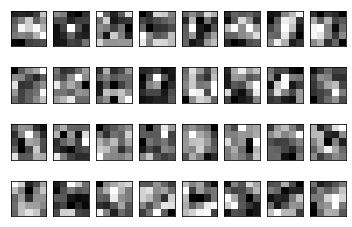

In [12]:
plot_filters_l0(CNNModel.layers[0], 8,4)

Plotting the first 32 filters (out of the 1024 ones) from the second Conv2D layers

In [13]:
def plot_filters_l1(layer, x, y):
    filters = layer.get_weights()[0].T[0]
    fig = plt.figure()
    for j in range(len(filters)):
        ax = fig.add_subplot(y, x, j+1)
        ax.matshow(filters[j].reshape(5,5), cmap='binary')
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.tight_layout
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\jcmeu\\Anaconda3\\envs\\GPU-enabled\\lib\\site-packages\\matplotlib\\pyplot.py'>

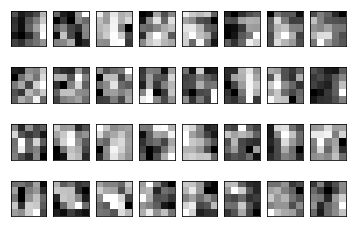

In [14]:
plot_filters_l1(CNNModel.layers[1], 8,4)

### Vizualizing intermediary layers

Setting up output for intermediate layers visualization

In [15]:
layer_outputs = [layer.output for layer in CNNModel.layers[:8]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=CNNModel.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [16]:
activations = activation_model.predict(x_train[0:8]) 
# Returns a list of five Numpy arrays: one array per layer activation

In [17]:
first_layer_activation = activations[0]


Plotting the the first layers output of the fourth sample

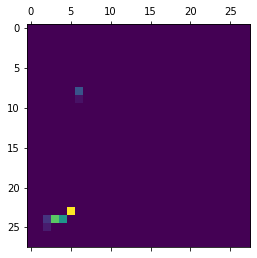

In [18]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


Plotting all intermediary layers up to the 8th layer type

<ipython-input-19-8124c0bf8b48>:18: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


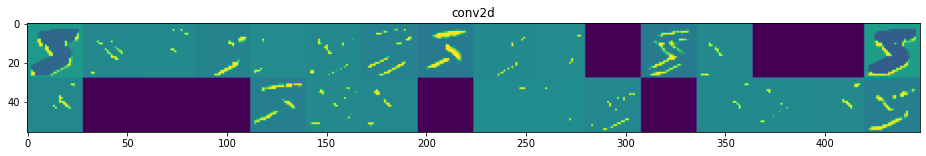

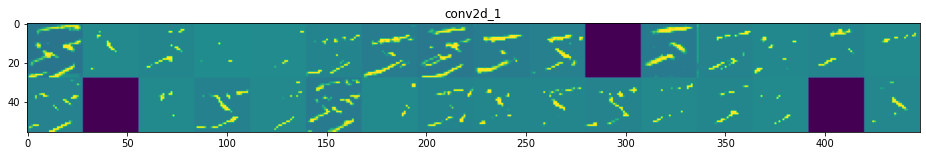

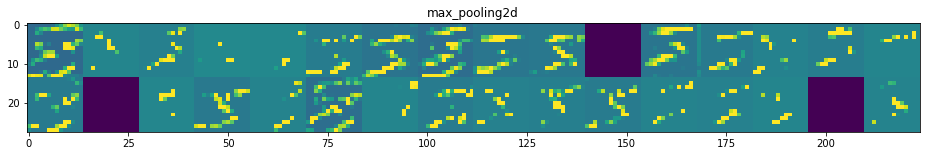

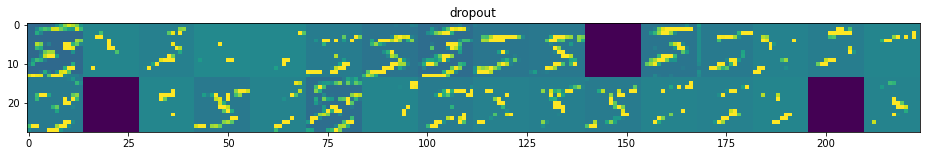

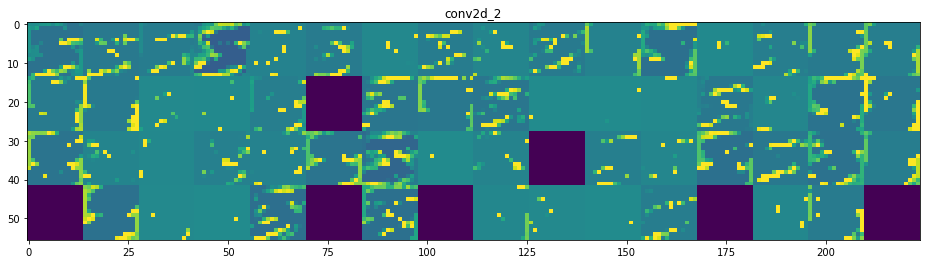

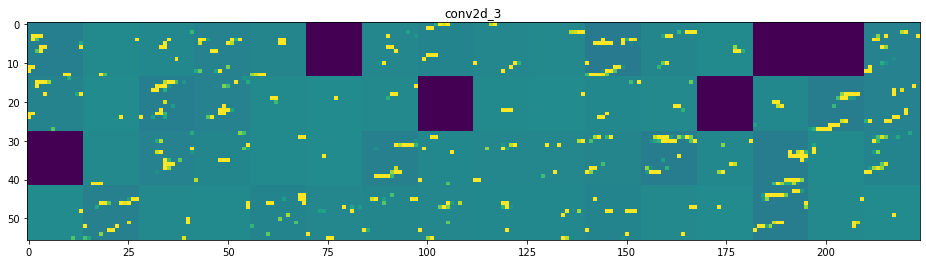

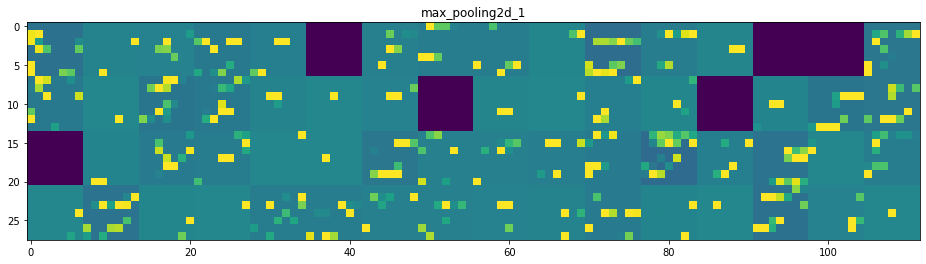

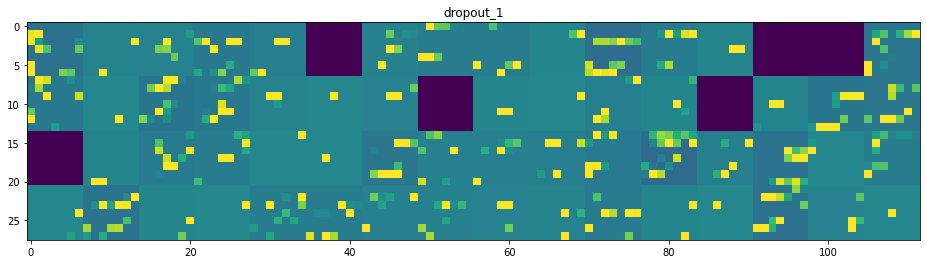

In [19]:
layer_names = []
for layer in CNNModel.layers[:8]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Visualization of model performance metrics

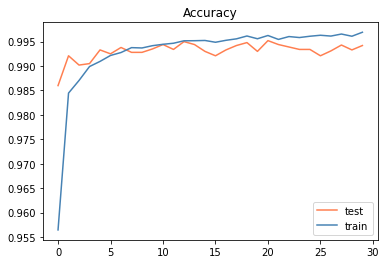

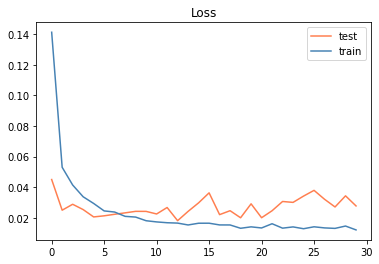

Best score validation test :  99.5199978351593 %


In [20]:
# Précision
plt.plot(history.history['val_accuracy'], c='coral', label='test')
plt.plot(history.history['accuracy'], c='steelblue', label='train')
plt.title('Accuracy')
plt.legend(["test","train"])
plt.show()
# Fonction de coût
plt.plot(history.history['val_loss'], c='coral', label='test')
plt.plot(history.history['loss'], c='steelblue', label='train')
plt.title('Loss')
plt.legend(["test","train"])
plt.show()

print("Best score validation test : ", max(history.history['val_accuracy']) * 100, "%" )